# Exercise 3


In [60]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

## Enzimatic reaction



In [154]:
# Initial conditions
k_1 = 1000
k_2 = 0.1
k_3 = 0.05
e_0 = 0.002
s_0 = 0.002
p_0 = 0
c_0 = 0
total_time = 100
dt = 0.1 # Incremento del tiempo

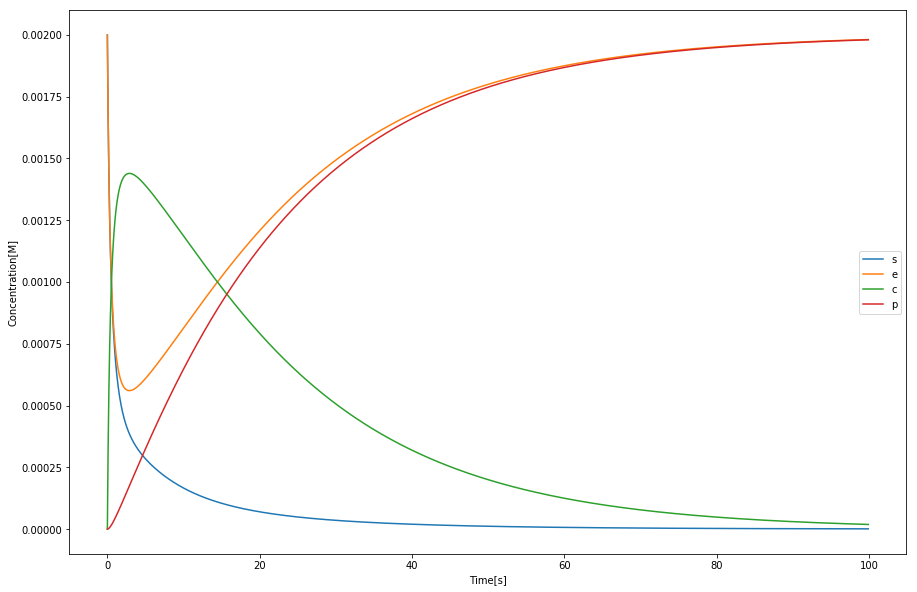

In [155]:
def model1(y, t, k_1, k_2, k_3):
    s = y[0]
    e = y[1]
    c = y[2]
    p = y[3] 
    dsdt = -k_1 * e * s + k_2 * c
    dedt = -k_1 * e * s + k_2 * c + k_3 * c
    dcdt = k_1 * e * s - k_2 * c - k_3 * c
    dpdt = k_3 * c
    
    dydt = [dsdt, dedt, dcdt, dpdt]
    return dydt

# initial condition
y0 = [s_0, e_0, c_0, p_0]

# time points
t = np.arange(0, total_time, dt)

# solve ODE
y = odeint(model1, y0, t, args=(k_1, k_2, k_3,))

plt.figure(figsize=(15,10))

# plot results
plt.plot(t, y[:,0], label = "s")
plt.plot(t, y[:,1], label = "e")
plt.plot(t, y[:,2], label = "c")
plt.plot(t, y[:,3], label = "p")

plt.xlabel("Time[s]")
plt.ylabel("Concentration[M]")
plt.legend(loc = "best")
plt.show()

## First constraint: conservation of mass

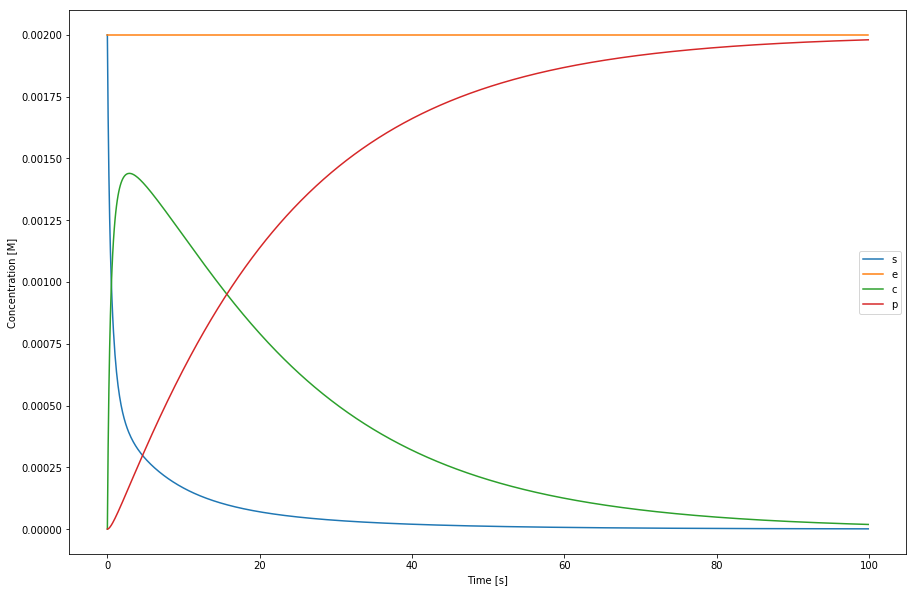

In [157]:
# [e] = [e_0] - [c]
def model2(y, t, k_1, k_2, k_3, e_0):
    s = y[0]
    c = y[2]
    p = y[3] 
    e = e_0 - c
    dsdt = -k_1 * e * s + k_2 * c
    dedt = 0
    dcdt = k_1 * e * s - k_2 * c - k_3 * c
    dpdt = k_3 * c
    
    dydt = [dsdt, dedt, dcdt, dpdt]
    return dydt

# initial condition
y0 = [s_0, e_0, c_0, p_0]

# time points
t = np.arange(0, total_time, dt)

# solve ODE
y = odeint(model2, y0, t, args=(k_1, k_2, k_3, e_0))

plt.figure(figsize=(15,10))

# plot results
plt.plot(t, y[:,0], label = "s")
plt.plot(t, y[:,1], label = "e")
plt.plot(t, y[:,2], label = "c")
plt.plot(t, y[:,3], label = "p")

plt.xlabel("Time [s]")
plt.ylabel("Concentration [M]")
plt.legend(loc = "best")
plt.show()

## Second constraint: Michaelis-Menten

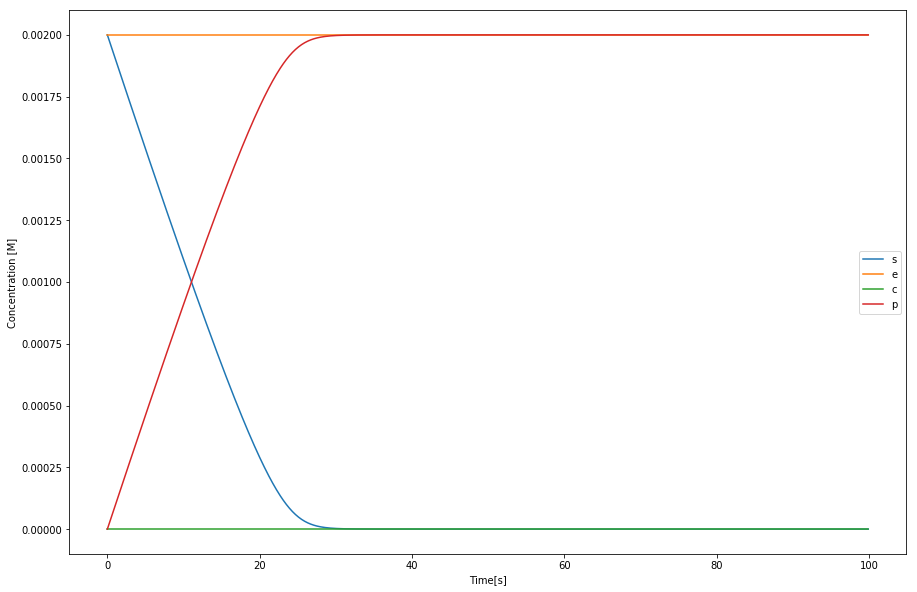

In [158]:
def model3(y, t, k_1, k_2, k_3, e_0):
    s = y[0]
    p = y[3] 
    c = (k_1 * e_0 * s) / (k_2 + k_3 + k_1*s)
    e = e_0 - c
    dsdt = -k_1 * e * s + k_2 * c
    dedt = 0
    dcdt = 0
    dpdt = k_3 * c
    
    dydt = [dsdt, dedt, dcdt, dpdt]
    return dydt

# initial condition
y0 = [s_0, e_0, c_0, p_0]

# time points
t = np.arange(0, total_time, dt)

# solve ODE
y = odeint(model3, y0, t, args=(k_1, k_2, k_3, e_0))

# plot results
plt.figure(figsize=(15,10))
plt.plot(t, y[:,0], label = "s")
plt.plot(t, y[:,1], label = "e")
plt.plot(t, y[:,2], label = "c")
plt.plot(t, y[:,3], label = "p")

plt.xlabel("Time[s]")
plt.ylabel("Concentration [M]")
plt.legend(loc = "best")
plt.show()

## Domain of validity of Michaelis-Menten

For definition, the model imposes:

$$s*k_1 \approx k_2 \gg k_3 $$

So we search parameters sets based on this relations.

We plot the results of several sets. The last one is the most similar over both models.

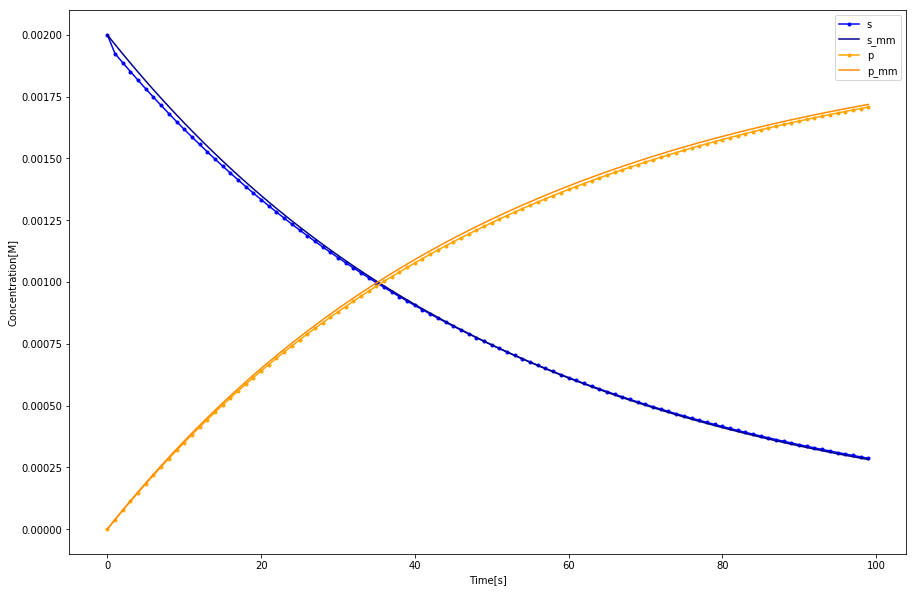

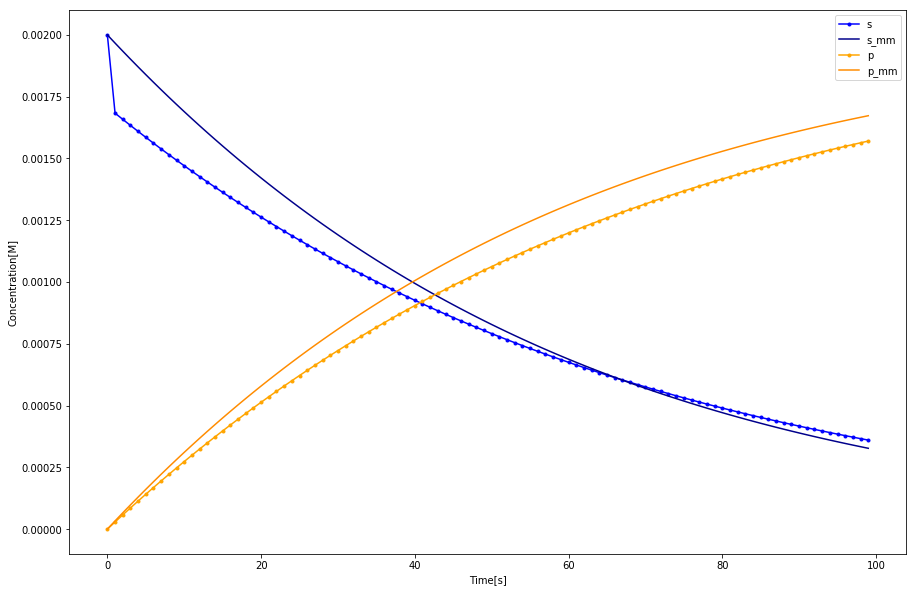

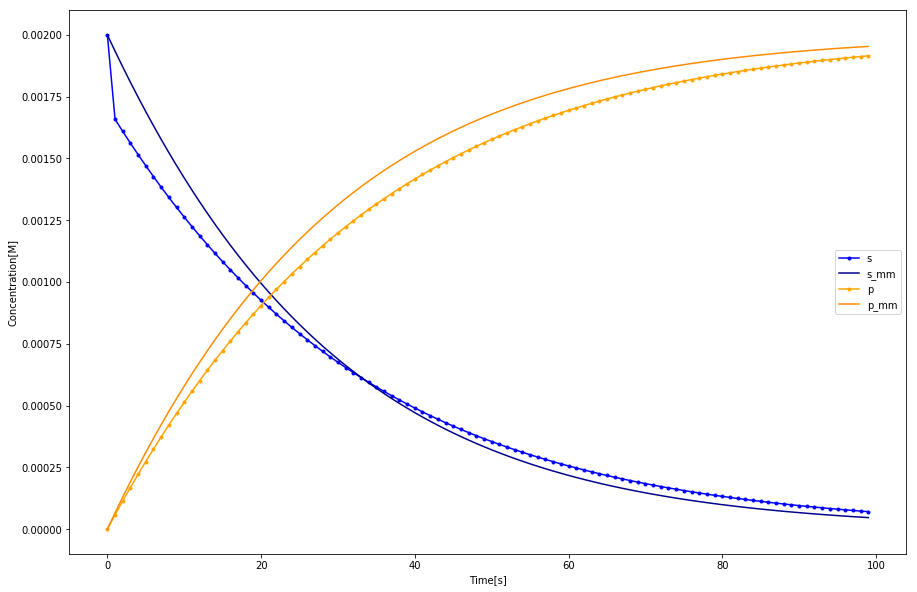

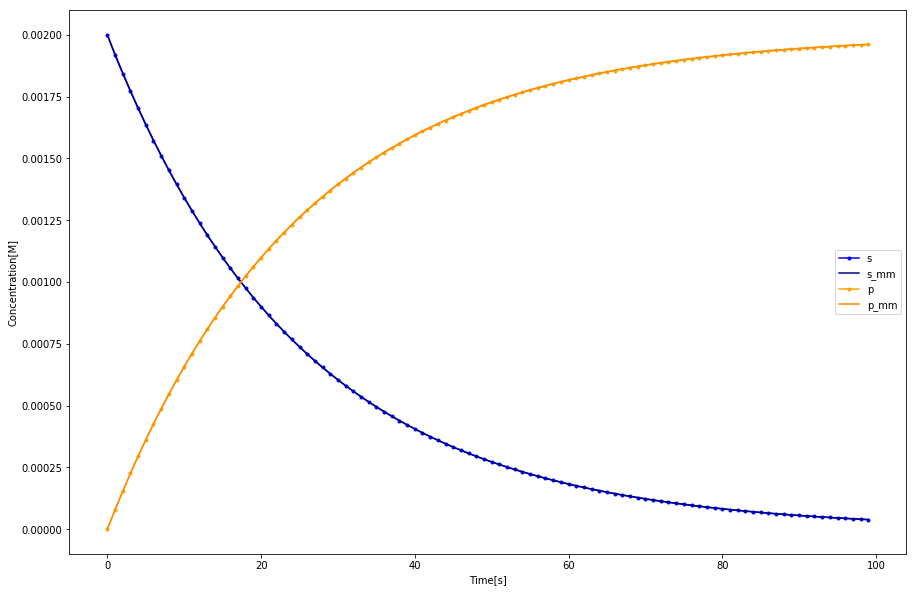

In [160]:
def solve_plot_models(k_1, k_2, k_3, s_0, e_0, p_0, c_0):
    # Solve model2 and model3
    y2 = odeint(model2, y0, t, args=(k_1, k_2, k_3,e_0))
    y3 = odeint(model3, y0, t, args=(k_1, k_2, k_3,e_0))

    # Plot models
    plt.figure(figsize=(15,10))
    plt.plot(t, y2[:,0], label = "s", color="blue", marker = ".")
    plt.plot(t, y3[:,0], label = "s_mm", color="darkblue")
    #plt.plot(t, y2[:,1], label = "e", color="red")
    #plt.plot(t, y3[:,1], label = "e_mm", color="darkred")
    #plt.plot(t, y2[:,2], label = "c", marker = ".", color="green")
    #plt.plot(t, y3[:,2], label = "c_mm", color="darkgreen")
    plt.plot(t, y2[:,3], label = "p", marker = ".", color="orange")
    plt.plot(t, y3[:,3], label = "p_mm", color="darkorange")
    plt.xlabel("Time[s]")
    plt.ylabel("Concentration[M]")
    plt.legend(loc = "best")
    plt.show()

dt = 1
t = np.arange(0, total_time, dt)
# Initial conditions
k_1 = 10000
s_0 = 0.1
k_2 = k_1 * s_0
k_3 = k_2/1000.0
e_0 = 0.002
p_0 = 0
c_0 = 0
solve_plot_models(k_1, k_2, k_3, s_0, e_0, p_0, c_0)

k_1 = 10000
s_0 = 0.01
k_2 = k_1 * s_0
k_3 = k_2/1000.0
e_0 = 0.002
p_0 = 0
c_0 = 0
solve_plot_models(k_1, k_2, k_3, s_0, e_0, p_0, c_0)

k_1 = 20000
s_0 = 0.01
k_2 = k_1 * s_0
k_3 = k_2/1000.0
e_0 = 0.002
p_0 = 0
c_0 = 0
solve_plot_models(k_1, k_2, k_3, s_0, e_0, p_0, c_0)


k_1 = 20000
s_0 = 1
k_2 = k_1 * s_0
k_3 = k_2/1000.0
e_0 = 0.002
p_0 = 0
c_0 = 0
solve_plot_models(k_1, k_2, k_3, s_0, e_0, p_0, c_0)